In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np



In [2]:
df = pd.read_csv('./' + 'hiv_data_uniqueSMILES_clusters.csv')
df.head()

,Ligand SMILES,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,...,BindingDB Target Chain Sequence.4,BindingDB Target Chain Sequence.5,BindingDB Target Chain Sequence.6,BindingDB Target Chain Sequence.7,BindingDB Target Chain Sequence.8,BindingDB Target Chain Sequence.9,BindingDB Target Chain Sequence.10,BindingDB Target Chain Sequence.11,BindingDB Target Chain Sequence.12,Cluster
0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.80,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
cluster_dataframes={}
for cluster in range(6):
    cluster_dataframes[f'Cluster_{cluster}'] = df[df['Cluster'] == cluster]
    print(cluster_dataframes[f'Cluster_{cluster}'].groupby('Target Name').size().reset_index(name='Compound Count'))


                                          Target Name  Compound Count
0   Dimer of Gag-Pol polyprotein [482-580,I502K,I5...               2
1   Dimer of Gag-Pol polyprotein [482-580,I502K,I5...               2
2        Dimer of Gag-Pol polyprotein [489-587,I539V]               6
3   Dimer of Gag-Pol polyprotein [489-587,L499I,L5...               6
4   Dimer of Gag-Pol polyprotein [489-587,M535I,L5...               6
5              Dimer of Gag-Pol polyprotein [489-587]              41
6   Dimer of Gag-Pol polyprotein [490-588,L523I,E5...               2
7   Dimer of Gag-Pol polyprotein [490-588,L523I,E5...               2
8        Dimer of Gag-Pol polyprotein [491-589,Q496K]              62
9   Dimer of Gag-Pol polyprotein [491-589,Q498K,D5...              16
10  Dimer of Gag-Pol polyprotein [491-589,Q498K,L5...              16
11  Dimer of Gag-Pol polyprotein [491-589,Q498K,L5...              16
12  Dimer of Gag-Pol polyprotein [491-589,Q7K,L33I...              10
13  Dimer of Gag-Pol

In [4]:
index_cluster0 = cluster_dataframes['Cluster_0'].index
index_cluster1 = cluster_dataframes['Cluster_1'].index
index_cluster2 = cluster_dataframes['Cluster_2'].index
index_cluster3 = cluster_dataframes['Cluster_3'].index


In [5]:
random_index_0 = np.random.choice(index_cluster0, size=5, replace=False)
random_index_1 = np.random.choice(index_cluster1, size=5, replace=False)
random_index_2 = np.random.choice(index_cluster2, size=5, replace=False)
random_index_3 = np.random.choice(index_cluster3, size=5, replace=False)


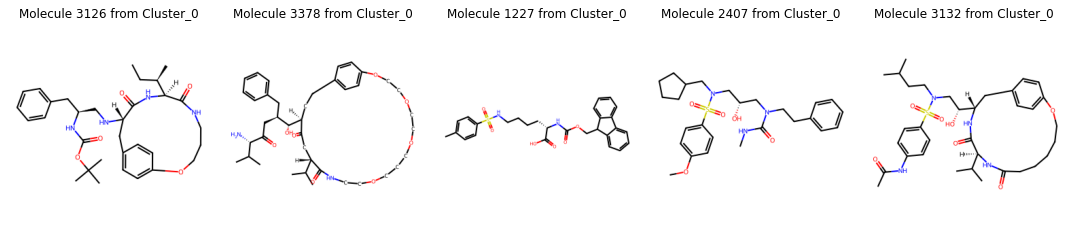

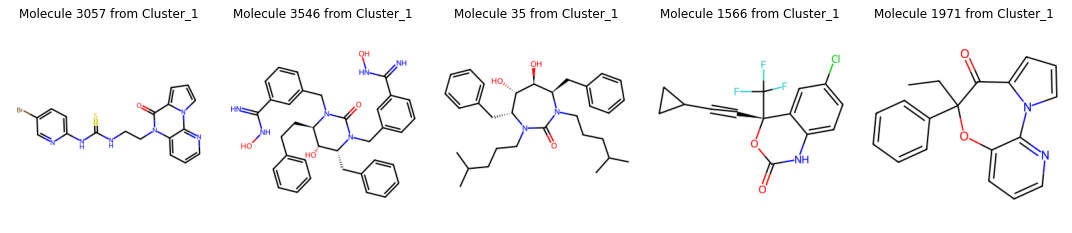

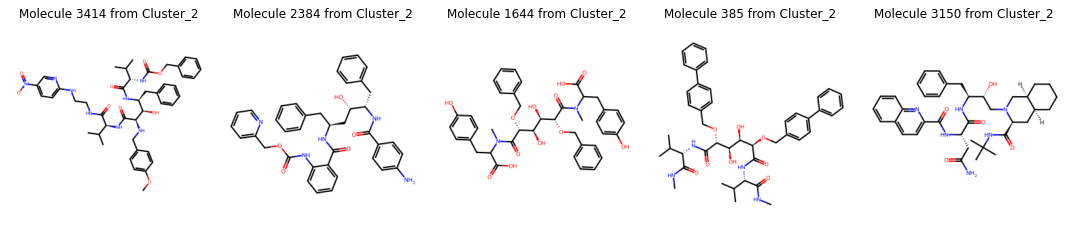

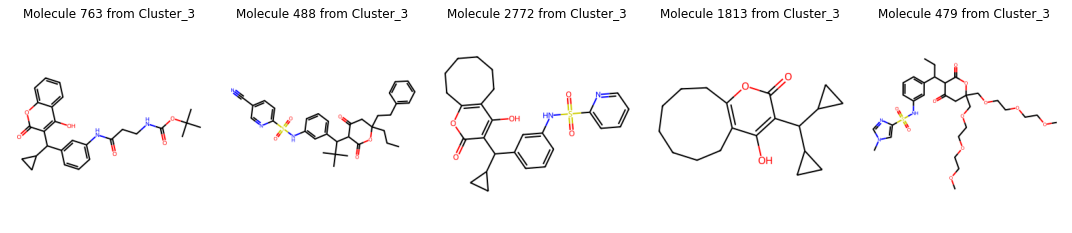

In [6]:
from rdkit.Chem import Draw
from rdkit import Chem

# Plot random molecules from each cluster
for cluster_index, random_indices in zip(range(6), [random_index_0, random_index_1, random_index_2, random_index_3]):
    cluster_name = f'Cluster_{cluster_index}'
    fig, ax = plt.subplots(1, 5, figsize=(15, 15), sharey=True, sharex=True)
    ax = ax.ravel()  # Flatten the 2D array of axes for easier iteration

    # Loop through the random indices for this cluster
    for idx, random_idx in enumerate(random_indices):
        # Retrieve the SMILES string for the ligand
        smiles = cluster_dataframes[cluster_name].loc[random_idx, 'Ligand SMILES']
        mol = Chem.MolFromSmiles(smiles)

        # Draw the molecule in the corresponding subplot
        img = Draw.MolToImage(mol)
        ax[idx].imshow(img)
        ax[idx].axis('off')  # Hide the axes
        ax[idx].set_title(f"Molecule {random_idx} from {cluster_name}")

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()


In [7]:
admet = pd.read_csv('./ADMET.csv')
admet.head()

,molecular_weight,logP,hydrogen_bond_acceptors,hydrogen_bond_donors,Lipinski,QED,stereo_centers,tpsa,AMES,BBB_Martins,...,Caco2_Wang_drugbank_approved_percentile,Clearance_Hepatocyte_AZ_drugbank_approved_percentile,Clearance_Microsome_AZ_drugbank_approved_percentile,Half_Life_Obach_drugbank_approved_percentile,HydrationFreeEnergy_FreeSolv_drugbank_approved_percentile,LD50_Zhu_drugbank_approved_percentile,Lipophilicity_AstraZeneca_drugbank_approved_percentile,PPBR_AZ_drugbank_approved_percentile,Solubility_AqSolDB_drugbank_approved_percentile,VDss_Lombardo_drugbank_approved_percentile
0,554.684,3.9584,5,4,3.0,0.230472,4,138.61,0.049839,0.273868,...,20.356727,53.276464,66.963940,81.620783,31.989143,78.131059,42.729740,72.586274,37.262505,11.399767
1,538.652,3.5414,5,4,3.0,0.246146,4,121.37,0.066045,0.177486,...,18.107794,64.249709,86.467623,92.865452,12.485459,96.393951,86.971694,77.665762,9.810004,14.424195
2,486.616,3.5149,4,3,4.0,0.431591,4,92.69,0.110521,0.540264,...,32.376890,76.502520,82.590151,62.000775,26.677007,98.953083,92.283831,76.851493,12.446685,4.459093
3,480.649,3.6311,4,3,4.0,0.405237,4,84.24,0.185684,0.681070,...,56.300892,85.730903,81.930981,75.998449,56.184568,96.044979,88.406359,81.271811,22.721985,16.518030
4,466.622,3.2410,4,3,4.0,0.444115,4,84.24,0.151374,0.713385,...,56.998837,85.886002,78.751454,68.321055,51.298953,96.316402,82.861574,73.051570,29.003490,10.856921


In [8]:
admet['cluster'] = df['Cluster'].copy()
admet.head()

,molecular_weight,logP,hydrogen_bond_acceptors,hydrogen_bond_donors,Lipinski,QED,stereo_centers,tpsa,AMES,BBB_Martins,...,Clearance_Hepatocyte_AZ_drugbank_approved_percentile,Clearance_Microsome_AZ_drugbank_approved_percentile,Half_Life_Obach_drugbank_approved_percentile,HydrationFreeEnergy_FreeSolv_drugbank_approved_percentile,LD50_Zhu_drugbank_approved_percentile,Lipophilicity_AstraZeneca_drugbank_approved_percentile,PPBR_AZ_drugbank_approved_percentile,Solubility_AqSolDB_drugbank_approved_percentile,VDss_Lombardo_drugbank_approved_percentile,cluster
0,554.684,3.9584,5,4,3.0,0.230472,4,138.61,0.049839,0.273868,...,53.276464,66.963940,81.620783,31.989143,78.131059,42.729740,72.586274,37.262505,11.399767,1
1,538.652,3.5414,5,4,3.0,0.246146,4,121.37,0.066045,0.177486,...,64.249709,86.467623,92.865452,12.485459,96.393951,86.971694,77.665762,9.810004,14.424195,1
2,486.616,3.5149,4,3,4.0,0.431591,4,92.69,0.110521,0.540264,...,76.502520,82.590151,62.000775,26.677007,98.953083,92.283831,76.851493,12.446685,4.459093,1
3,480.649,3.6311,4,3,4.0,0.405237,4,84.24,0.185684,0.681070,...,85.730903,81.930981,75.998449,56.184568,96.044979,88.406359,81.271811,22.721985,16.518030,1
4,466.622,3.2410,4,3,4.0,0.444115,4,84.24,0.151374,0.713385,...,85.886002,78.751454,68.321055,51.298953,96.316402,82.861574,73.051570,29.003490,10.856921,1


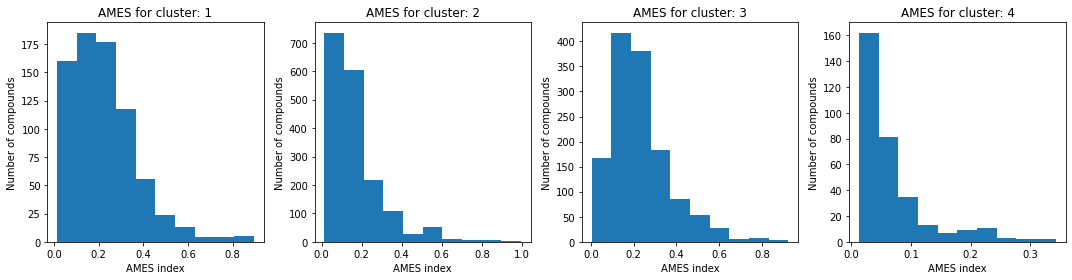

In [9]:
fig, ax = plt.subplots(1,4,figsize= (15,4))

for i in range(4):
    sbpl = ax[i]
    sbpl.hist(admet[admet['cluster'] == i]['AMES'], bins=10)
    sbpl.set_title(f'AMES for cluster: {i+1}')
    sbpl.set_xlabel('AMES index')
    sbpl.set_ylabel('Number of compounds')

plt.tight_layout()  
plt.show()


<Axes: xlabel='cluster', ylabel='AMES'>

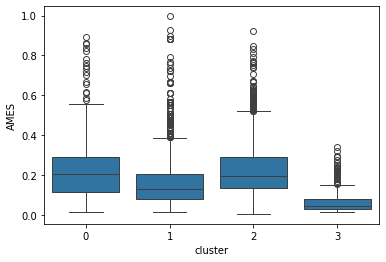

In [10]:
import seaborn as sns

sns.boxplot(data=admet, x="cluster", y="AMES")


In [11]:
from scipy import stats 

print(stats.ttest_ind(admet.loc[admet['cluster'] == 3]['AMES'], admet.loc[admet['cluster'] == 0]['AMES']))
print(stats.ttest_ind(admet.loc[admet['cluster'] == 3]['AMES'], admet.loc[admet['cluster'] == 1]['AMES']))
print(stats.ttest_ind(admet.loc[admet['cluster'] == 3]['AMES'], admet.loc[admet['cluster'] == 2]['AMES']))
print(admet.loc[admet['cluster'] == 0]['AMES'].mean())
print(admet.loc[admet['cluster'] == 1]['AMES'].mean())
print(admet.loc[admet['cluster'] == 2]['AMES'].mean())
print(admet.loc[admet['cluster'] == 3]['AMES'].mean())

TtestResult(statistic=-18.614984338265174, pvalue=3.2814465430306876e-67, df=1069.0)
TtestResult(statistic=-13.185369791646862, pvalue=3.3903047891397813e-38, df=2094.0)
TtestResult(statistic=-20.847815794876738, pvalue=7.025072401864842e-86, df=1652.0)
0.22414795441425656
0.16951504529365627
0.22976666419445188
0.068303552062179


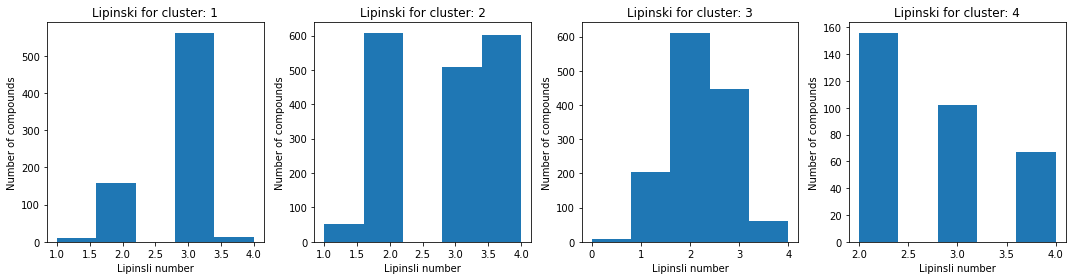

In [12]:
fig, ax = plt.subplots(1,4,figsize= (15,4))

for i in range(4):
    sbpl = ax[i]
    sbpl.hist(admet[admet['cluster'] == i]['Lipinski'], bins=5)
    sbpl.set_title(f'Lipinski for cluster: {i+1}')
    sbpl.set_xlabel('Lipinsli number')
    sbpl.set_ylabel('Number of compounds')

plt.tight_layout()  
plt.show()

<Axes: xlabel='cluster', ylabel='Lipinski'>

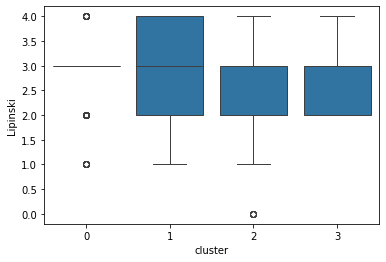

In [13]:
sns.boxplot(data=admet, x="cluster", y="Lipinski")

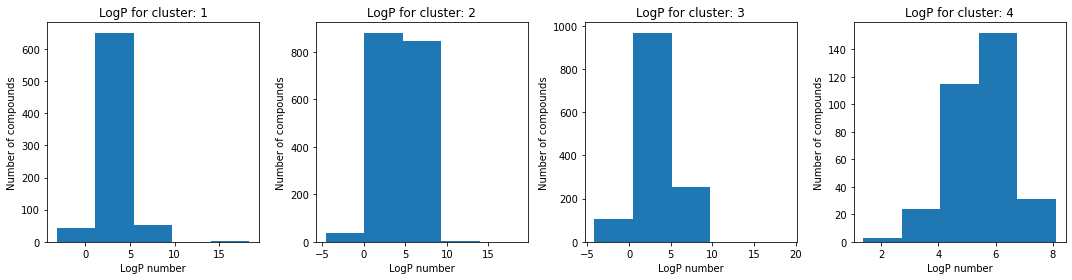

In [14]:
fig, ax = plt.subplots(1,4,figsize= (15,4))

for i in range(4):
    sbpl = ax[i]
    sbpl.hist(admet[admet['cluster'] == i]['logP'], bins=5)
    sbpl.set_title(f'LogP for cluster: {i+1}')
    sbpl.set_xlabel('LogP number')
    sbpl.set_ylabel('Number of compounds')

plt.tight_layout()  
plt.show()

#Typical values that are considered good for a drug candidate resides somewhere between 2 and 5 which 
# means at least a factor 100 more lipophilic than hydrophilic. 
# It needs to be polar (hydrophilic) to a certain extent since blood mainly consists of water.
# It needs to be non-polar (lipophilic) since it needs to be able to cross lipid membranes.

<Axes: xlabel='cluster', ylabel='logP'>

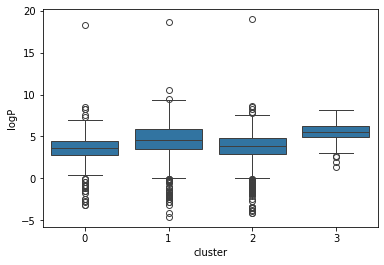

In [15]:
sns.boxplot(data=admet, x="cluster", y="logP")

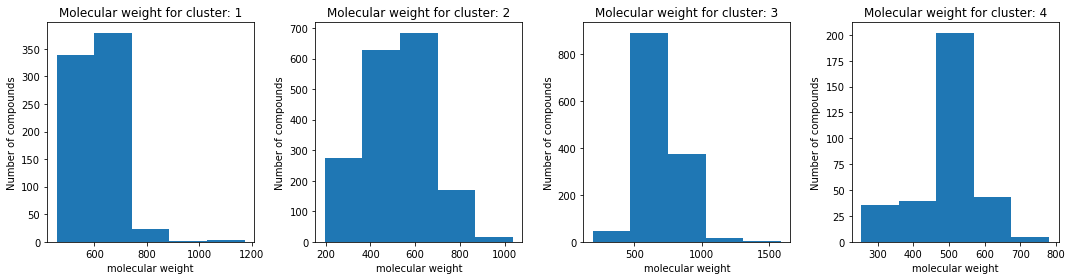

In [16]:
fig, ax = plt.subplots(1,4,figsize= (15,4))

for i in range(4):
    sbpl = ax[i]
    sbpl.hist(admet[admet['cluster'] == i]['molecular_weight'], bins=5)
    sbpl.set_title(f'Molecular weight for cluster: {i+1}')
    sbpl.set_xlabel('molecular weight')
    sbpl.set_ylabel('Number of compounds')

plt.tight_layout()  
plt.show()

<Axes: xlabel='cluster', ylabel='molecular_weight'>

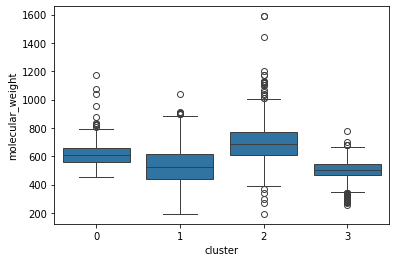

In [17]:
sns.boxplot(data=admet, x="cluster", y="molecular_weight")


In [18]:
admet['hydrogen bonds'] = admet['hydrogen_bond_acceptors'] + admet['hydrogen_bond_donors']

<Axes: xlabel='cluster', ylabel='hydrogen bonds'>

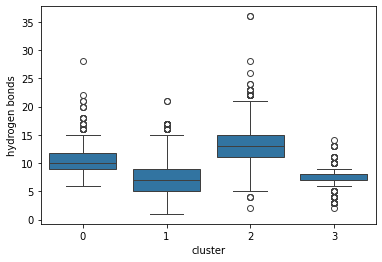

In [19]:
sns.boxplot(data=admet, x="cluster", y="hydrogen bonds")

<Axes: xlabel='cluster', ylabel='BBB_Martins'>

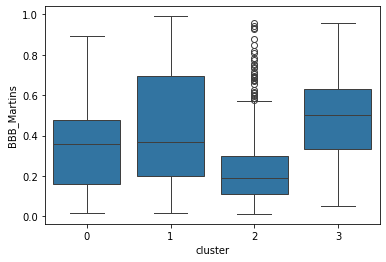

In [20]:
sns.boxplot(data=admet, x="cluster", y="BBB_Martins")

#0 totally non-permeable, 1 totally permeable from https://figshare.com/collections/_/6491158

<Axes: xlabel='cluster', ylabel='DILI'>

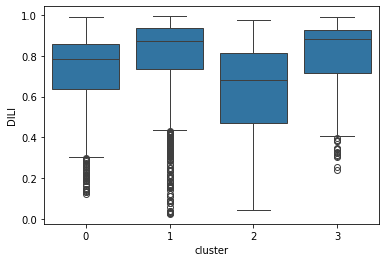

In [21]:
sns.boxplot(data=admet, x="cluster", y="DILI")


<Axes: xlabel='cluster', ylabel='ClinTox'>

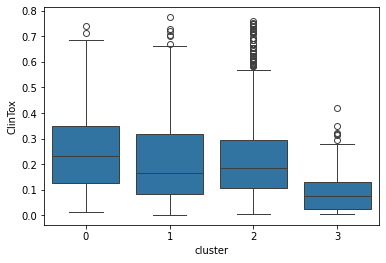

In [22]:
sns.boxplot(data=admet, x="cluster", y="ClinTox")

Text(0.5, 1.0, 'PCA')

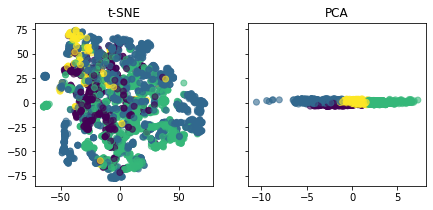

In [23]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN

X = admet[['Caco2_Wang','PAMPA_NCATS','HIA_Hou','Pgp_Broccatelli', 'Bioavailability_Ma', 'Lipophilicity_AstraZeneca','Solubility_AqSolDB','HydrationFreeEnergy_FreeSolv']]
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(X)
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=admet['cluster'], alpha=0.6)
axs[0].set_title("t-SNE")


X_reduced_pca = PCA(n_components=3).fit(X).transform(X)
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('TkAgg')


# Extract 3D data and cluster labels
X = admet[['hydrogen bonds', 'Lipinski','logP']].values
clusters = admet['cluster'].values

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, color by cluster
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')

# Add color bar (showing the cluster mapping)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

# Label axes
ax.set_xlabel('hydrogen bonds')
ax.set_ylabel('Lipinski')
ax.set_zlabel('logP')
ax.set_title('3D Scatter Plot with Cluster Colors')

# Initial view
ax.view_init(elev=20, azim=30)

# Rotate the plot programmatically (for animation purposes)
for azim in range(0, 360, 5):
    ax.view_init(elev=20, azim=azim)
    plt.draw()  # Redraw the plot
    plt.pause(0.1)  # Pause to update the plot

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('TkAgg')


# Extract 3D data and cluster labels
X = admet[['BBB_Martins', 'PPBR_AZ','VDss_Lombardo']].values
clusters = admet['cluster'].values

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, color by cluster
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')

# Add color bar (showing the cluster mapping)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

# Label axes
ax.set_xlabel('BBB')
ax.set_ylabel('PPBR')
ax.set_zlabel('VDss')
ax.set_title('3D Scatter Plot with Cluster Colors')

# Initial view
ax.view_init(elev=20, azim=30)

# Rotate the plot programmatically (for animation purposes)
for azim in range(0, 360, 5):
    ax.view_init(elev=20, azim=azim)
    plt.draw()  # Redraw the plot
    plt.pause(0.1)  # Pause to update the plot

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('TkAgg')


# Extract 3D data and cluster labels
X = admet[['hydrogen bonds', 'Lipinski','logP']].values
clusters = admet['cluster'].values

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, color by cluster
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')

# Add color bar (showing the cluster mapping)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

# Label axes
ax.set_xlabel('hydrogen bonds')
ax.set_ylabel('Lipinski')
ax.set_zlabel('logP')
ax.set_title('3D Scatter Plot with Cluster Colors')

# Initial view
ax.view_init(elev=20, azim=30)

# Rotate the plot programmatically (for animation purposes)
for azim in range(0, 360, 5):
    ax.view_init(elev=20, azim=azim)
    plt.draw()  # Redraw the plot
    plt.pause(0.1)  # Pause to update the plot

# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

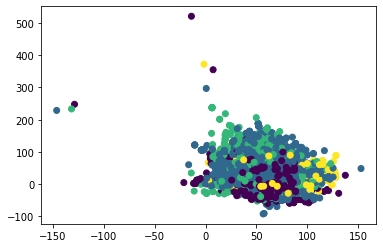

In [27]:
plt.scatter(x=admet['Clearance_Hepatocyte_AZ'], y=admet['Half_Life_Obach'], c=admet['cluster'], cmap='viridis')
plt.show()

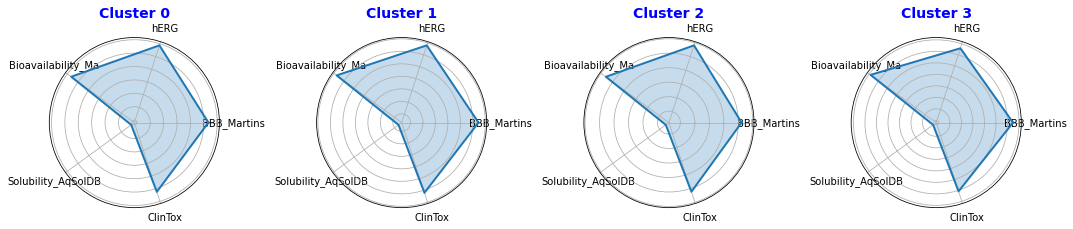

In [28]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['BBB_Martins', 'hERG', 'Bioavailability_Ma', 'Solubility_AqSolDB', 'ClinTox']

fig, ax = plt.subplots(1, 4, figsize=(15, 4), subplot_kw=dict(polar=True))

for i in range(4):
    sbpl = ax[i]
    
    values = [
        admet[admet['cluster'] == i]['BBB_Martins'].mean(),
        admet[admet['cluster'] == i]['hERG'].mean(),
        admet[admet['cluster'] == i]['Bioavailability_Ma'].mean(),
        admet[admet['cluster'] == i]['Solubility_AqSolDB'].mean(),
        admet[admet['cluster'] == i]['ClinTox'].mean()
    ]
    
    # Number of categories
    num_vars = len(categories)
    
    # Compute the angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Make the plot circular
    values += values[:1]
    angles += angles[:1]

    # Plot the data on the current axis
    sbpl.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    
    # Fill the area under the plot
    sbpl.fill(angles, values, alpha=0.25)
    
    # Set the labels for each axis
    sbpl.set_yticklabels([])  # Hide radial ticks
    sbpl.set_xticks(angles[:-1])  # Remove last duplicate angle
    sbpl.set_xticklabels(categories, fontsize=10)

    # Set the title for each subplot
    sbpl.set_title(f'Cluster {i}', size=14, color='blue', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()
